# LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import  train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6928 - accuracy: 0.5296 - val_loss: 0.6926 - val_accuracy: 0.5384
Epoch 2/100
 11/313 [>.............................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5682

C:\Users\khj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 11ms/step - loss: 0.6919 - accuracy: 0.5795 - val_loss: 0.6915 - val_accuracy: 0.5694
Epoch 3/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6900 - accuracy: 0.6059 - val_loss: 0.6888 - val_accuracy: 0.6126
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6854 - accuracy: 0.6376 - val_loss: 0.6814 - val_accuracy: 0.6548
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6675 - accuracy: 0.6817 - val_loss: 0.6439 - val_accuracy: 0.7002
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6112 - accuracy: 0.7117 - val_loss: 0.5967 - val_accuracy: 0.7092
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5815 - accuracy: 0.7248 - val_loss: 0.5729 - val_accuracy: 0.7278
Epoch 8/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5573 - accuracy: 0.7431 - val_loss: 0.5504 - val_accuracy: 0.7438
Epoc

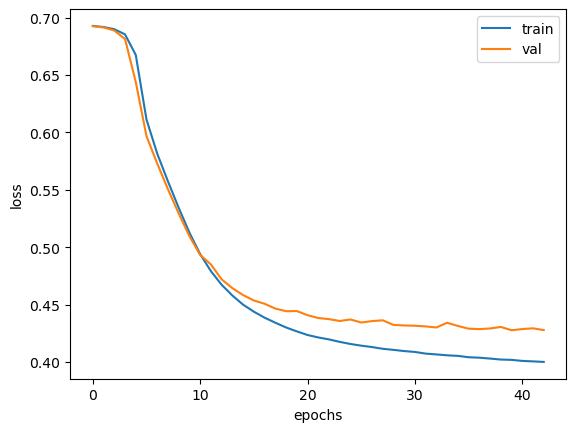

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 순환층에 드롭아웃 적용하기

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6926 - accuracy: 0.5295 - val_loss: 0.6921 - val_accuracy: 0.5598
Epoch 2/100
 11/313 [>.............................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5554

C:\Users\khj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 12ms/step - loss: 0.6912 - accuracy: 0.5709 - val_loss: 0.6904 - val_accuracy: 0.5870
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6883 - accuracy: 0.6108 - val_loss: 0.6861 - val_accuracy: 0.6276
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6794 - accuracy: 0.6469 - val_loss: 0.6686 - val_accuracy: 0.6772
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6292 - accuracy: 0.6952 - val_loss: 0.5912 - val_accuracy: 0.7038
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5807 - accuracy: 0.7089 - val_loss: 0.5669 - val_accuracy: 0.7248
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5562 - accuracy: 0.7316 - val_loss: 0.5440 - val_accuracy: 0.7456
Epoch 8/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5353 - accuracy: 0.7495 - val_loss: 0.5261 - val_accuracy: 0.7570
Epoc

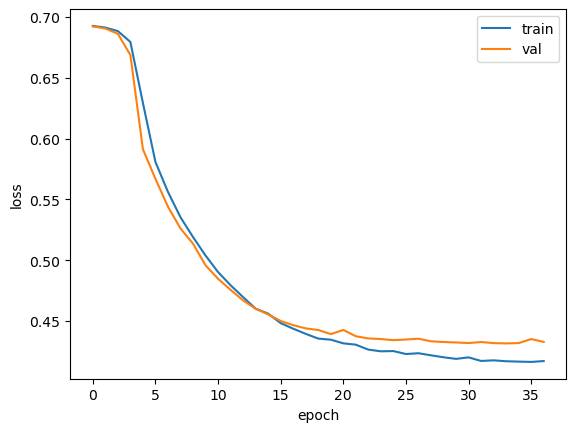

In [9]:
plt.plot((history.history['loss']))
plt.plot((history.history['val_loss']))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 2개의 층을 연결하기

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6928 - accuracy: 0.5238 - val_loss: 0.6927 - val_accuracy: 0.5128
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6919 - accuracy: 0.5517 - val_loss: 0.6913 - val_accuracy: 0.5850
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6893 - accuracy: 0.5956 - val_loss: 0.6867 - val_accuracy: 0.6328
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6796 - accuracy: 0.6416 - val_loss: 0.6682 - val_accuracy: 0.6670
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6329 - accuracy: 0.6781 - val_loss: 0.5894 - val_accuracy: 0.7024
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5676 - accuracy: 0.7145 - val_loss: 0.5455 - val_accuracy: 0.7272
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5390 - accuracy: 0.7352 - val_loss: 0.5225 - val_accuracy:

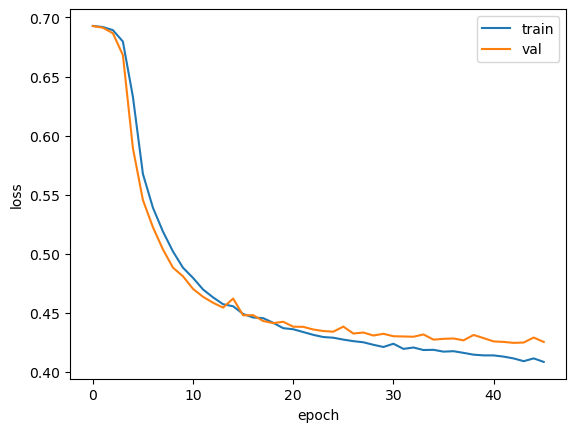

In [13]:
plt.plot((history.history['loss']))
plt.plot((history.history['val_loss']))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GRU 신경망 훈련하기

In [14]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6921 - accuracy: 0.5426 - val_loss: 0.6913 - val_accuracy: 0.5504
Epoch 2/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6899 - accuracy: 0.5770 - val_loss: 0.6888 - val_accuracy: 0.5808
Epoch 3/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6866 - accuracy: 0.5993 - val_loss: 0.6850 - val_accuracy: 0.5882
Epoch 4/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6816 - accuracy: 0.6125 - val_loss: 0.6793 - val_accuracy: 0.6018
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6743 - accuracy: 0.6212 - val_loss: 0.6714 - val_accuracy: 0.6130
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6640 - accuracy: 0.6313 - val_loss: 0.6601 - val_accuracy: 0.6254
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6493 - accuracy: 0.6426 - val_loss: 0.6436 - val_accuracy:

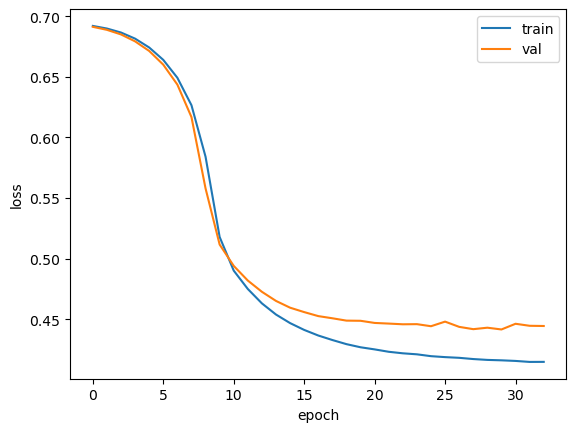

In [17]:
plt.plot((history.history['loss']))
plt.plot((history.history['val_loss']))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# LSTM과 GRU 셀로 훈련

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 18: invalid start byte